In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [9]:
# IQR(Q3 - Q1)로부터 이상치 파악하기
bmi_q1 = df['atemp'].quantile(q=0.25)
bmi_q3 = df['atemp'].quantile(q=0.75)
iqr = bmi_q3 - bmi_q1

# (q1 - (iqr * 1.5))와 (q3 + (iqr * 1.5))를 벗어난 값이 이상치입니다.
condi1 = (df['atemp'] < (bmi_q1 - (1.5 * iqr)))
condi2 = (df['atemp'] > (bmi_q3 + (1.5 * iqr)))
outliers = df[condi1 | condi2]
outliers['atemp']

Series([], Name: atemp, dtype: float64)

In [13]:
iqr

14.395

In [11]:
condi1.unique()

array([False])

In [12]:
condi2.unique()

array([False])

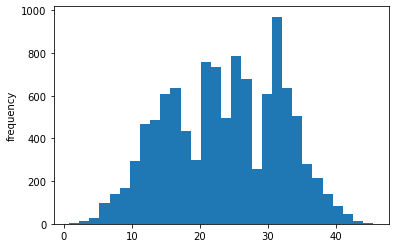

In [23]:
plt.figsize = (10, 10)
plt.hist(df['atemp'], bins=30)
plt.xlabel('')
plt.ylabel('frequency')
plt.show()

In [31]:
bike["datetime"] = pd.to_datetime(bike["datetime"])

In [32]:
bike["date"] = bike["datetime"].dt.date

In [37]:
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19


In [42]:
bike_100 = bike.groupby("date")["humidity"].max().reset_index()

In [43]:
bike_100

,date,humidity
0,2011-01-01,94
1,2011-01-02,100
2,2011-01-03,69
3,2011-01-04,74
4,2011-01-05,74
...,...,...
451,2012-12-15,87
452,2012-12-16,93
453,2012-12-17,100
454,2012-12-18,94


In [56]:
bike_100 =  bike_100.loc[bike_100["humidity"] == 100, ]

In [58]:
bike_100.head(2)

,date,humidity
1,2011-01-02,100
20,2011-02-02,100


In [61]:
bike_join = pd.merge(left = bike, right = bike_100, left_on = bike["date"], right_on = bike_100["date"], how = "inner")

In [63]:
bike_30t = bike_join.loc[bike_join["temp"] > 30, ]

In [65]:
bike_30t

,key_0,datetime,season,holiday,workingday,weather,temp,atemp,humidity_x,windspeed,casual,registered,count,date_x,date_y,humidity_y
297,2011-04-11,2011-04-11 15:00:00,2,0,1,1,30.34,33.335,48,35.0008,56,85,141,2011-04-11,2011-04-11,100
298,2011-04-11,2011-04-11 16:00:00,2,0,1,1,30.34,33.335,48,35.0008,73,162,235,2011-04-11,2011-04-11,100
299,2011-04-11,2011-04-11 17:00:00,2,0,1,1,30.34,33.335,48,35.0008,100,352,452,2011-04-11,2011-04-11,100
487,2011-06-17,2011-06-17 13:00:00,2,0,1,1,30.34,34.090,62,19.0012,48,156,204,2011-06-17,2011-06-17,100
488,2011-06-17,2011-06-17 14:00:00,2,0,1,1,31.16,34.850,52,12.9980,73,142,215,2011-06-17,2011-06-17,100
489,2011-06-17,2011-06-17 15:00:00,2,0,1,1,31.98,34.850,43,15.0013,62,181,243,2011-06-17,2011-06-17,100
490,2011-06-17,2011-06-17 16:00:00,2,0,1,1,31.16,34.090,45,11.0014,69,286,355,2011-06-17,2011-06-17,100
491,2011-06-17,2011-06-17 17:00:00,2,0,1,3,31.16,34.090,40,12.9980,85,467,552,2011-06-17,2011-06-17,100
492,2011-06-17,2011-06-17 18:00:00,2,0,1,3,31.16,34.090,40,12.9980,62,388,450,2011-06-17,2011-06-17,100
560,2011-09-09,2011-09-09 15:00:00,3,0,1,1,30.34,34.850,66,0.0000,27,161,188,2011-09-09,2011-09-09,100


In [64]:
bike_30t["count"].mean()

338.75

In [13]:
bike_100.set_index("date")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
date,,,,,,,,,,,,,
2011-01-02,2011-01-02 02:00:00,1,0,0,2,17.22,21.210,100,19.0012,1,8,9,2
2011-02-02,2011-02-02 10:00:00,1,0,1,2,9.02,13.635,100,0.0000,2,59,61,10
2011-02-05,2011-02-05 05:00:00,1,0,0,3,8.20,11.365,100,6.0032,0,9,9,5
2011-02-05,2011-02-05 06:00:00,1,0,0,3,8.20,12.880,100,0.0000,0,4,4,6
2011-02-05,2011-02-05 08:00:00,1,0,0,3,8.20,11.365,100,6.0032,0,10,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-10,2012-12-10 08:00:00,4,0,1,2,17.22,21.210,100,16.9979,9,575,584,8
2012-12-10,2012-12-10 09:00:00,4,0,1,2,17.22,21.210,100,15.0013,11,273,284,9
2012-12-10,2012-12-10 12:00:00,4,0,1,3,18.04,21.970,100,15.0013,23,150,173,12


In [15]:
bike_mg = pd.merge(left = bike, right = bike_100, left_on = bike["date"], right_on = bike_100["date"], how = "inner")

In [19]:
bike_mg

,key_0,datetime_x,season_x,holiday_x,workingday_x,weather_x,temp_x,atemp_x,humidity_x,windspeed_x,...,weather_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,count_y,hour_y,date_y
0,2011-01-02,2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,...,2,17.22,21.21,100,19.0012,1,8,9,2,2011-01-02
1,2011-01-02,2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,...,2,17.22,21.21,100,19.0012,1,8,9,2,2011-01-02
2,2011-01-02,2011-01-02 02:00:00,1,0,0,2,17.22,21.210,100,19.0012,...,2,17.22,21.21,100,19.0012,1,8,9,2,2011-01-02
3,2011-01-02,2011-01-02 03:00:00,1,0,0,2,18.86,22.725,94,12.9980,...,2,17.22,21.21,100,19.0012,1,8,9,2,2011-01-02
4,2011-01-02,2011-01-02 04:00:00,1,0,0,2,18.86,22.725,94,12.9980,...,2,17.22,21.21,100,19.0012,1,8,9,2,2011-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,2012-12-17,2012-12-17 19:00:00,4,0,1,2,17.22,21.210,88,8.9981,...,3,14.76,18.94,100,0.0000,2,3,5,4,2012-12-17
3517,2012-12-17,2012-12-17 20:00:00,4,0,1,2,17.22,21.210,94,16.9979,...,3,14.76,18.94,100,0.0000,2,3,5,4,2012-12-17
3518,2012-12-17,2012-12-17 21:00:00,4,0,1,2,17.22,21.210,94,8.9981,...,3,14.76,18.94,100,0.0000,2,3,5,4,2012-12-17
3519,2012-12-17,2012-12-17 22:00:00,4,0,1,2,17.22,21.210,94,8.9981,...,3,14.76,18.94,100,0.0000,2,3,5,4,2012-12-17


In [22]:
bike_mg2 = bike_mg.loc[bike_mg["temp_x"] > 30, ].reset_index(drop = True)

In [25]:
bike_mg2["count_x"].mean()

304.6666666666667

In [2]:
import pandas as pd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind # tt+tab눌러서 불러오기 다외울수없음

In [3]:
df = pd.read_csv("bike.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
ttest_1samp(df["temp"], popmean=20)

Ttest_1sampResult(statistic=3.0914087709393696, pvalue=0.0019971246609168593)

In [5]:
df = pd.read_csv("bike.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [19]:
df["year"] = df["datetime"].dt.year
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011


In [21]:
df["month"] = df["datetime"].dt.month
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011


In [24]:
df1 = (df.loc[df["year"] == 2011])
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011


In [29]:
df2 = (df1.loc[df["month"] == 1])
df2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2011-01-19 19:00:00,1,0,1,1,13.12,14.395,57,27.9993,4,108,112,2011-01-19,1,2011
427,2011-01-19 20:00:00,1,0,1,1,13.12,15.150,49,19.9995,2,74,76,2011-01-19,1,2011
428,2011-01-19 21:00:00,1,0,1,1,13.12,14.395,49,27.9993,4,55,59,2011-01-19,1,2011
429,2011-01-19 22:00:00,1,0,1,1,12.30,15.150,52,11.0014,6,53,59,2011-01-19,1,2011


In [32]:
stat, p = ttest_rel(df2["casual"], df2["registered"])
print(abs(round(stat, 3)))
print(round(p, 3))

21.41
0.0


In [38]:
import pandas as pd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

In [39]:
df = pd.read_csv("bike.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [40]:
df["holiday"].unique()

array([0, 1], dtype=int64)

In [41]:
df["workingday"].unique()

array([0, 1], dtype=int64)

In [48]:
df1 = (df.loc[df["holiday"] == 1])
df1.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,2011-01-17 00:00:00,1,1,0,2,8.2,9.85,47,15.0013,1,16,17
373,2011-01-17 01:00:00,1,1,0,2,8.2,9.85,44,12.9980,1,15,16


In [52]:
df2 = (df.loc[df["workingday"] == 1])
df2.head(2)

array([1], dtype=int64)

In [50]:
stat, p = ttest_ind(df1["registered"], df2["registered"])
print(round(stat, 3))
print(round(p, 3))

-3.239
0.001


In [53]:
df.loc[df["workingday"]]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [54]:
df["workingday"]

0        0
1        0
2        0
3        0
4        0
        ..
10881    1
10882    1
10883    1
10884    1
10885    1
Name: workingday, Length: 10886, dtype: int64

In [55]:
df = pd.read_csv("bike.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [58]:
from scipy.stats import f_oneway

In [59]:
f_oneway(df.loc[(df["season"] == 1), "temp"],
         df.loc[(df["season"] == 2), "temp"],
         df.loc[(df["season"] == 3), "temp"],
         df.loc[(df["season"] == 4), "temp"],)

F_onewayResult(statistic=6040.687453316907, pvalue=0.0)

In [66]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [68]:
model = ols(formula = "temp ~ C(season)", data = df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,412885.270005,137628.423335,6040.687453,0.0
Residual,10882.0,247930.804947,22.783570,NaN,NaN


In [69]:
df = pd.read_csv("bike.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [73]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["weekday"] = df["datetime"].dt.weekday
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5


In [76]:
result = pairwise_tukeyhsd(df["registered"], df["weekday"])
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1   6.1979    0.9  -9.7188  22.1146  False
     0      2    5.343    0.9 -10.5427  21.2287  False
     0      3  12.7424 0.2132  -3.1383   28.623  False
     0      4   6.2956    0.9  -9.6471  22.2384  False
     0      5 -27.5063  0.001 -43.3091 -11.7036   True
     0      6 -36.7583  0.001 -52.5734 -20.9431   True
     1      2  -0.8549    0.9 -16.7716  15.0618  False
     1      3   6.5445 0.8863  -9.3671  22.4561  False
     1      4   0.0977    0.9 -15.8759  16.0713  False
     1      5 -33.7042  0.001 -49.5381 -17.8704   True
     1      6 -42.9562  0.001 -58.8024 -27.1099   True
     2      3   7.3994 0.7916  -8.4813    23.28  False
     2      4   0.9526    0.9 -14.9901  16.8954  False
     2      5 -32.8493  0.001 -48.6521 -17.0466   True
     2      6 -42.1013  0.001 -57.9164 -26.2861   True
     3    

### 평균을 기준으로 1.5 표준편차를 넘어서는 값을 이상치라고 간주 할 때 Sepal.Length 변수를 기준으로 이상치인 row 개수는 몇개인가?
- iris.csv

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("iris.csv")
df.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [25]:
a = df["Sepal.Length"] < (df["Sepal.Length"].mean() - (df["Sepal.Length"].std() * 1.5))
b = df["Sepal.Length"] > (df["Sepal.Length"].mean() + (df["Sepal.Length"].std() * 1.5))

In [26]:
len(df.loc[a | b])

21

In [27]:
len(a)

150

In [28]:
len(b)

150

### 문제3: 시간대별 registered 평균을 산출했을 때 값이 가장 큰 시간은?
- bike.csv 파일 사용
- hour 어트리뷰트 활용

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [3]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [7]:
df["datetime"]

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [9]:
df["hour"] = df["datetime"].dt.hour
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1


In [15]:
df1 = df.groupby("hour")["registered"].mean().reset_index()

In [23]:
df1

,hour,registered
0,0,44.826374
1,1,27.345815
2,2,18.080357
3,3,9.076212
4,4,5.144796
5,5,18.311947
6,6,72.109890
7,7,202.202198
8,8,341.226374
9,9,190.824176


In [1]:
import pandas as pd

In [2]:
df_A = pd.read_csv("join_data_group_members.csv")
df_B = pd.read_csv("join_data_member_room.csv")

In [3]:
df_A.head(2)

,team,No,member
0,TWICE,1414,미나
1,TWICE,1462,나연


In [4]:
df_B.head(2)

,floor,room,name
0,3,3G-A,미나
1,3,3G-B,나연


In [16]:
pd.merge(left = df_A, right = df_B, left_on = "member", right_on = "name", how = "left").isna().sum()

team      0
No        0
member    0
floor     5
room      5
name      5
dtype: int64

In [17]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [19]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [20]:
df["hour"] = df["datetime"].dt.hour
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1


In [23]:
df_2 = df.loc[df["season"] == 2, ]
df_4 = df.loc[df["season"] == 4, ]

In [45]:
df_2mean = df_2.groupby("hour")["registered"].mean()
df_4mean = df_4.groupby("hour")["registered"].mean()

In [47]:
abs(df_2mean - df_4mean).idxmax()

19

In [90]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [91]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [92]:
df["date"] = df["datetime"].dt.date
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1


In [95]:
df = df.loc[:, ["humidity", "temp", "count", "date"]]

In [116]:
df_h = df.groupby("date")["humidity"].max().reset_index()
df_h = df_h.loc[df_h["humidity"]==100]

In [117]:
df_m = pd.merge(left = df, right = df_h, left_on = "date", right_on = "date", how = "inner")
df_m.head(2)

,humidity_x,temp,count,date,humidity_y
0,88,18.86,17,2011-01-02,100
1,94,18.04,17,2011-01-02,100


In [119]:
df_mt = df_m.loc[df_m["temp"] > 30, ]

In [120]:
df_mt["count"].mean()

338.75

In [121]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [123]:
pd.crosstab(df["workingday"], df["holiday"], normalize=True)

holiday,0,1
workingday,,
0,0.290557,0.028569
1,0.680875,0.000000


In [125]:
df = pd.read_csv("diamonds.csv")
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [168]:
pd.crosstab(df["cut"], df["color"]).reset_index().melt(id_vars = "cut").sort_values("value", ascending = False)

,cut,color,value
17,Ideal,G,4884
7,Ideal,E,3903
12,Ideal,F,3826
22,Ideal,H,3115
18,Premium,G,2924
2,Ideal,D,2834
9,Very Good,E,2400
23,Premium,H,2360
8,Premium,E,2337
13,Premium,F,2331


In [169]:
df = pd.read_csv("diamonds.csv")
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [180]:
df_mean = df.groupby(["cut", "color"])[["price", "carat"]].mean().reset_index()
df_mean.head(2)

,cut,color,price,carat
0,Fair,D,4291.06135,0.920123
1,Fair,E,3682.31250,0.856607


In [182]:
df_mean["diff"] = df_mean["price"] / df_mean["carat"]
df_mean.head(2)

,cut,color,price,carat,diff
0,Fair,D,4291.06135,0.920123,4663.575143
1,Fair,E,3682.31250,0.856607,4298.717949


In [185]:
df_mean.sort_values("diff", ascending=False)

,cut,color,price,carat,diff
24,Premium,G,4500.742134,0.841488,5348.553755
17,Ideal,G,3720.706388,0.700715,5309.874382
23,Premium,F,4324.890176,0.827036,5229.388117
26,Premium,I,5946.180672,1.144937,5193.456761
16,Ideal,F,3374.939362,0.655829,5146.069664
25,Premium,H,5216.706780,1.016449,5132.285040
30,Very Good,F,3778.820240,0.740961,5099.889612
31,Very Good,G,3872.753806,0.766799,5050.548821
21,Premium,D,3631.292576,0.721547,5032.648015
33,Very Good,I,5255.879568,1.046952,5020.173260


In [2]:
import pandas as pd
from scipy.stats import ttest_1samp

In [4]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [6]:
stat, p = ttest_1samp(df["temp"], popmean = 20)
print(round(stat, 3))
print(round(p, 3))

3.091
0.002


In [7]:
from scipy.stats import ttest_rel

In [8]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [9]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [21]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["time"] = df["datetime"].dt.time
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19:00:00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,20:00:00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,21:00:00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,22:00:00


In [23]:
df2 = df.loc[:, ["year", "month", "time", "casual", "registered"]]
df2.head(2)

,year,month,time,casual,registered
0,2011,1,00:00:00,3,13
1,2011,1,01:00:00,8,32


In [35]:
df3 = df2.loc[df2["year"]== 2011, ]
df4 = df3.loc[df3["month"] == 1]
df4

,year,month,time,casual,registered
0,2011,1,00:00:00,3,13
1,2011,1,01:00:00,8,32
2,2011,1,02:00:00,5,27
3,2011,1,03:00:00,3,10
4,2011,1,04:00:00,0,1
...,...,...,...,...,...
426,2011,1,19:00:00,4,108
427,2011,1,20:00:00,2,74
428,2011,1,21:00:00,4,55
429,2011,1,22:00:00,6,53


In [41]:
stat, p = ttest_rel(df4["casual"], df4["registered"])
print(round(abs(stat), 3))
print(round(p, 3))

21.41
0.0


In [42]:
from scipy.stats import ttest_ind

In [43]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [44]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [45]:
df["weekday"] = df["datetime"].dt.weekday
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2


In [47]:
df_1 = df.loc[df["weekday"] <= 4, ] # 주중
df_2 = df.loc[df["weekday"] > 4, ] # 주말

In [53]:
stat, p = ttest_ind(df_1.loc[:, "registered"],
          df_2.loc[:, "registered"])
print(round(abs(stat), 3))
print(round(abs(p), 3))

12.073
0.0


In [50]:
df_1.loc[:, "registered"]

47         5
48         2
49         1
50         3
51        30
        ... 
10881    329
10882    231
10883    164
10884    117
10885     84
Name: registered, Length: 7723, dtype: int64

In [54]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [55]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [60]:
model = ols(formula = "temp ~ C(season)", data = df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,412885.270005,137628.423335,6040.687453,0.0
Residual,10882.0,247930.804947,22.783570,NaN,NaN


In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [61]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [63]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["weekday"] = df["datetime"].dt.weekday
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5


In [66]:
result = pairwise_tukeyhsd(df["registered"], df["weekday"])
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1   6.1979    0.9  -9.7188  22.1146  False
     0      2    5.343    0.9 -10.5427  21.2287  False
     0      3  12.7424 0.2132  -3.1383   28.623  False
     0      4   6.2956    0.9  -9.6471  22.2384  False
     0      5 -27.5063  0.001 -43.3091 -11.7036   True
     0      6 -36.7583  0.001 -52.5734 -20.9431   True
     1      2  -0.8549    0.9 -16.7716  15.0618  False
     1      3   6.5445 0.8863  -9.3671  22.4561  False
     1      4   0.0977    0.9 -15.8759  16.0713  False
     1      5 -33.7042  0.001 -49.5381 -17.8704   True
     1      6 -42.9562  0.001 -58.8024 -27.1099   True
     2      3   7.3994 0.7916  -8.4813    23.28  False
     2      4   0.9526    0.9 -14.9901  16.8954  False
     2      5 -32.8493  0.001 -48.6521 -17.0466   True
     2      6 -42.1013  0.001 -57.9164 -26.2861   True
     3    

In [1]:
import pandas as pd
from scipy.stats import f
from scipy.stats import bartlett
from scipy.stats import levene

In [17]:
df = pd.read_csv("financial_info_10k_persons.csv")
df.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65


In [18]:
df["mean"] = df["Total_trans_amt"] / df["Total_trans_cnt"]
df.head()

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt,mean
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67,62.432836
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65,63.707692
2,3,0,57,F,2,Uneducated,Single,$40K - $60K,Silver,36,6,3,0,19482.0,1421,22,64.590909
3,4,0,57,F,2,Doctorate,Single,Less than $40K,Blue,44,2,2,3,9149.0,14401,100,144.010000
4,5,0,63,F,1,Uneducated,Single,Unknown,Blue,55,4,3,1,16312.0,4366,68,64.205882


In [22]:
M = df.loc[df["Gender"] == "M", "mean"]
F = df.loc[df["Gender"] == "F", "mean"]

In [23]:
F2 = M.var() / F.var()
F2

1.6665446172570928

In [24]:
result = f.cdf(F2, dfd = len(M) - 1, dfn = len(F))
result

0.9999999999999999

In [26]:
p = (1 - result) * 2
p

2.220446049250313e-16

In [29]:
df = pd.read_csv("financial_info_10k_persons.csv")
df.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65


In [31]:
df["age_dae"] = (df["Age"] // 10) * 10
df.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt,age_dae
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67,40
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65,30


In [33]:
df["mean"] = df["Total_trans_amt"] / df["Total_trans_cnt"]

In [35]:
a50 = df.loc[df["age_dae"] == 50, "mean"]
a60 = df.loc[df["age_dae"] == 60, "mean"]
a70 = df.loc[df["age_dae"] == 70, "mean"]

In [40]:
bt = bartlett(a50, a60 , a70)

In [42]:
round(bt[1], 3)

0.004

In [44]:
df = pd.read_csv("financial_info_10k_persons.csv")
df.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65


In [79]:
df["mean"] = df["Total_trans_amt"] / df["Total_trans_cnt"]
df.head()

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt,mean
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67,62.432836
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65,63.707692
2,3,0,57,F,2,Uneducated,Single,$40K - $60K,Silver,36,6,3,0,19482.0,1421,22,64.590909
3,4,0,57,F,2,Doctorate,Single,Less than $40K,Blue,44,2,2,3,9149.0,14401,100,144.010000
4,5,0,63,F,1,Uneducated,Single,Unknown,Blue,55,4,3,1,16312.0,4366,68,64.205882


In [81]:
df2 = df[(df["Gender"] == 'M') & (df["Dependent_cnt"] == 0)]
df2.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt,mean
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65,63.707692
26,27,0,32,M,0,College,Unknown,Less than $40K,Blue,36,3,3,4,3788.0,3975,65,61.153846


In [82]:
df3 = df2.reset_index(drop = True)

In [87]:
df3["mean"] = df3["Total_trans_amt"] / df3["Total_trans_cnt"]
df3.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt,mean
0,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65,63.707692
1,27,0,32,M,0,College,Unknown,Less than $40K,Blue,36,3,3,4,3788.0,3975,65,61.153846


In [86]:
4141 / 65

63.707692307692305

In [88]:
df3["Edu_level"].unique()

array(['High School', 'College', 'Unknown', 'Graduate', 'Uneducated',
       'Doctorate', 'Post-Graduate'], dtype=object)

In [89]:
levene(df3.loc[df3["Edu_level"] == "High School", "mean"], 
       df3.loc[df3["Edu_level"] == "College", "mean"],
       df3.loc[df3["Edu_level"] == "Unknown", "mean"],
       df3.loc[df3["Edu_level"] == "Graduate", "mean"],
       df3.loc[df3["Edu_level"] == "Uneducated", "mean"],
       df3.loc[df3["Edu_level"] == "Doctorate", "mean"],
       df3.loc[df3["Edu_level"] == "Post-Graduate", "mean"])

LeveneResult(statistic=0.8832361640792544, pvalue=0.5070685402777693)

In [76]:
print(round(p, 3))

0.099


In [71]:
df3.loc[df3["Edu_level"] == "High School", "mean"]

0       62.432836
2       64.590909
5      148.300000
9       69.557143
11      37.228571
          ...    
396     62.766234
402     60.564103
403     53.617647
406     42.842105
408     55.356164
Name: mean, Length: 100, dtype: float64

In [64]:
df3.loc[df3["Edu_level"] = "College", "mean"]

SyntaxError: invalid syntax (Temp/ipykernel_1552/2294344100.py, line 1)

In [90]:
from scipy.stats import chi2_contingency

In [91]:
df = pd.read_csv("financial_info_10k_persons.csv")
df.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65


In [95]:
df2 = df.loc[(df["Edu_level"] == "High School")]
df2.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65


In [97]:
chi2_contingency(pd.crosstab(df2["Gender"], df2["is_attrited"]), correction = False)

(3.979589535548525,
 0.04605478481460392,
 1,
 array([[867.82258065, 152.17741935],
        [820.17741935, 143.82258065]]))

In [98]:
df = pd.read_csv("financial_info_10k_persons.csv")
df.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65


In [100]:
chi2_contingency(pd.crosstab(df["Gender"], df["Card"]))

(66.45702170623164,
 2.4470625495771945e-14,
 3,
 array([[4962.486 ,   59.0076,   10.632 ,  283.8744],
        [4372.514 ,   51.9924,    9.368 ,  250.1256]]))

In [101]:
df = pd.read_csv("financial_info_10k_persons.csv")
df.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65


In [113]:
chi2_contingency(pd.crosstab(df["Inactive_last_12m"] >= 3, df["is_attrited"]))

(210.74834292621756,
 9.431916381955241e-48,
 1,
 array([[4606.4112,  869.5888],
        [3805.5888,  718.4112]]))

In [114]:
df["Inactive_last_12m"]

0       2
1       3
2       3
3       2
4       3
       ..
9995    1
9996    3
9997    1
9998    3
9999    4
Name: Inactive_last_12m, Length: 10000, dtype: int64

In [115]:
df.loc[df["Inactive_last_12m"]]

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
2,3,0,57,F,2,Uneducated,Single,$40K - $60K,Silver,36,6,3,0,19482.0,1421,22
3,4,0,57,F,2,Doctorate,Single,Less than $40K,Blue,44,2,2,3,9149.0,14401,100
3,4,0,57,F,2,Doctorate,Single,Less than $40K,Blue,44,2,2,3,9149.0,14401,100
2,3,0,57,F,2,Uneducated,Single,$40K - $60K,Silver,36,6,3,0,19482.0,1421,22
3,4,0,57,F,2,Doctorate,Single,Less than $40K,Blue,44,2,2,3,9149.0,14401,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65
3,4,0,57,F,2,Doctorate,Single,Less than $40K,Blue,44,2,2,3,9149.0,14401,100
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65
3,4,0,57,F,2,Doctorate,Single,Less than $40K,Blue,44,2,2,3,9149.0,14401,100


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  int64  
 1   is_attrited            10000 non-null  int64  
 2   Age                    10000 non-null  int64  
 3   Gender                 10000 non-null  object 
 4   Dependent_cnt          10000 non-null  int64  
 5   Edu_level              10000 non-null  object 
 6   Marital_status         10000 non-null  object 
 7   Income                 10000 non-null  object 
 8   Card                   10000 non-null  object 
 9   Period_m               10000 non-null  int64  
 10  Total_rel_cnt          10000 non-null  int64  
 11  Inactive_last_12m      10000 non-null  int64  
 12  Contacts_cnt_last_12m  10000 non-null  int64  
 13  Credit_limit           10000 non-null  float64
 14  Total_trans_amt        10000 non-null  int64  
 15  Tot

In [125]:
df = pd.read_csv("financial_info_10k_persons.csv")
df.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65


In [126]:
df["siljeok"] = (df["Inactive_last_12m"] >= 3) + 0
df.head(2)

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt,siljeok
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67,0
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65,1


In [127]:
chi2_contingency(pd.crosstab(df["siljeok"], df["is_attrited"]))

(210.74834292621756,
 9.431916381955241e-48,
 1,
 array([[4606.4112,  869.5888],
        [3805.5888,  718.4112]]))

In [1]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [3]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [5]:
df[["temp", "atemp", "humidity", "casual"]].corr()

,temp,atemp,humidity,casual
temp,1.000000,0.984948,-0.064949,0.467097
atemp,0.984948,1.000000,-0.043536,0.462067
humidity,-0.064949,-0.043536,1.000000,-0.348187
casual,0.467097,0.462067,-0.348187,1.000000


In [17]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [19]:
df = pd.get_dummies(df, columns = ["season"])
df.head(2)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0


In [22]:
s1 = df.loc[df["season_1"] == 1]
s2 = df.loc[df["season_2"] == 1]
s3 = df.loc[df["season_3"] == 1]
s4 = df.loc[df["season_4"] == 1]

In [25]:
s1[["atemp", "casual"]].corr()

,atemp,casual
atemp,1.000000,0.478312
casual,0.478312,1.000000


In [26]:
s2[["atemp", "casual"]].corr()


,atemp,casual
atemp,1.000000,0.378122
casual,0.378122,1.000000


In [27]:
s3[["atemp", "casual"]].corr()


,atemp,casual
atemp,1.000000,0.381423
casual,0.381423,1.000000


In [28]:
s4[["atemp", "casual"]].corr()


,atemp,casual
atemp,1.000000,0.443751
casual,0.443751,1.000000


In [29]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [33]:
df[["season", "atemp", "casual"]].groupby("season").corr()

atemp    casual
season                           
1      atemp   1.000000  0.478312
       casual  0.478312  1.000000
2      atemp   1.000000  0.378122
       casual  0.378122  1.000000
3      atemp   1.000000  0.381423
       casual  0.381423  1.000000
4      atemp   1.000000  0.443751
       casual  0.443751  1.000000

In [43]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [41]:
df["weather"].unique()

array([1, 2, 3, 4], dtype=int64)

In [47]:
df["weather_1"] = (df["weather"] == 1) + 0
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_1
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1


In [49]:
df[["weather_1", "temp", "casual"]].groupby("weather_1").corr()

temp    casual
weather_1                           
0         temp    1.000000  0.446361
          casual  0.446361  1.000000
1         temp    1.000000  0.471053
          casual  0.471053  1.000000

In [50]:
0.471053 - 0.446361

0.02469199999999999

In [1]:
(102-96.8)**2 + (92-96.8)**2 + (98-96.8)**2 + (88 - 96.8)**2 + (104-96.8)**2

180.8

In [2]:
180.8 / 4

45.2

In [3]:
import pandas as pd
from statsmodels.formula.api import ols

In [4]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=123)

In [8]:
model = ols(formula= "registered ~ temp", data = df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     902.3
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.92e-187
Time:                        19:18:18   Log-Likelihood:                -48650.
No. Observations:                7620   AIC:                         9.730e+04
Df Residuals:                    7618   BIC:                         9.732e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.5151      4.559      6.036      0.000      18.579      36.452
temp           6.3391      0.211     30.038      0.000       5.925       6.753
==============================================================================
Omnibus:                     2097.525   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5337.402
Skew:                           1.502   Prob(JB):                         0.00
Kurtosis:                       5.790   Cond. No.                         60.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [11]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=123)

In [12]:
model = ols(formula= "casual ~ atemp", data = df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     2138.
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:20:57   Log-Likelihood:                -39689.
No. Observations:                7620   AIC:                         7.938e+04
Df Residuals:                    7618   BIC:                         7.940e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.2974      1.498    -19.554      0.000     -32.234     -26.360
atemp          2.7672      0.060     46.243      0.000       2.650       2.885
==============================================================================
Omnibus:                     4125.373   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34148.771
Skew:                           2.494   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
pred = model.predict(df_test)

In [17]:
mean_squared_error(y_true = df_test["casual"], y_pred = pred) ** 0.5

44.462370102714324

In [1]:
from sklearn import linear_model

In [ ]:
LinearRegression()

In [2]:
from sklearn.linear_model import LinearRegression

In [ ]:
LinearRegression()